In [94]:
import pandas as pd
import matplotlib.pyplot as plt
import re

In [95]:
df = pd.read_csv('./lessons/grad/andrewwongls.csv')

In [96]:
df.head()

,Unnamed: 0,dates,lesson
0,69,"Saturday, Aug 17th",Getting Started on Your Resume
1,70,"Saturday, Jun 22nd",Section Recap
2,71,"Saturday, Jun 22nd",Bidirectional Sequence Models - Lab
3,72,"Saturday, Jun 22nd",Bidirectional Sequence Models
4,73,"Friday, May 31st",LSTMs and GRUs - Lab


In [97]:
df.tail()

,Unnamed: 0,dates,lesson
1063,1132,"Friday, Oct 19th 2018",Problems Data Science Can Solve
1064,1133,"Friday, Oct 19th 2018",Introduction
1065,1134,"Friday, Oct 19th 2018",Introduction
1066,1135,"Friday, Oct 19th 2018",Welcome
1067,1136,"Friday, Oct 19th 2018",Welcome


In [98]:
df[df['lesson'] == 'Welcome']

,Unnamed: 0,dates,lesson
1066,1135,"Friday, Oct 19th 2018",Welcome
1067,1136,"Friday, Oct 19th 2018",Welcome


In [99]:
df.shape

(1068, 3)

In [100]:
df.drop_duplicates(subset = ['lesson'], inplace = True)

In [101]:
df.head()

,Unnamed: 0,dates,lesson
0,69,"Saturday, Aug 17th",Getting Started on Your Resume
1,70,"Saturday, Jun 22nd",Section Recap
2,71,"Saturday, Jun 22nd",Bidirectional Sequence Models - Lab
3,72,"Saturday, Jun 22nd",Bidirectional Sequence Models
4,73,"Friday, May 31st",LSTMs and GRUs - Lab


In [102]:
df.tail()

,Unnamed: 0,dates,lesson
1058,1127,"Saturday, Oct 20th 2018",Working With Lessons On Learn
1059,1128,"Saturday, Oct 20th 2018",Working with Lessons on Learn
1060,1129,"Friday, Oct 19th 2018",The Data Science Process
1062,1131,"Friday, Oct 19th 2018",Problems Data Science Can Solve
1066,1135,"Friday, Oct 19th 2018",Welcome


In [103]:
df.shape

(629, 3)

In [104]:
df.drop('Unnamed: 0', axis = 1, inplace = True)

In [105]:
test_19 = df.loc[0, 'dates']
test_18 = df.loc[1066, 'dates']

In [106]:
test_19, test_18

('Saturday, Aug 17th', 'Friday, Oct 19th 2018')

In [107]:
mon, day = test_19.split(',')[1].strip().split(' ')

In [108]:
month = {'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'Jun': 6, 'Jul': 7, 
        'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12}

In [109]:
month[mon]

8

In [110]:
day

'17th'

In [111]:
def update_date(date_value):
    split_date = date_value.split(',')[1].strip().split(' ')
    day_extract = re.findall(r'\d+', split_date[1])[0]
    if len(split_date) == 2:
        return (f"{month[split_date[0]]}/{day_extract}/2019")
    else:
        return (f"{month[split_date[0]]}/{day_extract}/{split_date[2]}")

In [112]:
update_date(test_19)

'8/17/2019'

In [113]:
update_date(test_18)

'10/19/2018'

In [114]:
df.head()

,dates,lesson
0,"Saturday, Aug 17th",Getting Started on Your Resume
1,"Saturday, Jun 22nd",Section Recap
2,"Saturday, Jun 22nd",Bidirectional Sequence Models - Lab
3,"Saturday, Jun 22nd",Bidirectional Sequence Models
4,"Friday, May 31st",LSTMs and GRUs - Lab


In [115]:
new_dates = []

for x in df['dates']:
    new_dates.append(update_date(x))

In [116]:
df['new_dates'] = new_dates

In [117]:
df.head()

,dates,lesson,new_dates
0,"Saturday, Aug 17th",Getting Started on Your Resume,8/17/2019
1,"Saturday, Jun 22nd",Section Recap,6/22/2019
2,"Saturday, Jun 22nd",Bidirectional Sequence Models - Lab,6/22/2019
3,"Saturday, Jun 22nd",Bidirectional Sequence Models,6/22/2019
4,"Friday, May 31st",LSTMs and GRUs - Lab,5/31/2019


In [118]:
df['new_dates'] = pd.to_datetime(df['new_dates'])

In [119]:
df.head()

,dates,lesson,new_dates
0,"Saturday, Aug 17th",Getting Started on Your Resume,2019-08-17
1,"Saturday, Jun 22nd",Section Recap,2019-06-22
2,"Saturday, Jun 22nd",Bidirectional Sequence Models - Lab,2019-06-22
3,"Saturday, Jun 22nd",Bidirectional Sequence Models,2019-06-22
4,"Friday, May 31st",LSTMs and GRUs - Lab,2019-05-31


In [120]:
df.dtypes

dates                object
lesson               object
new_dates    datetime64[ns]
dtype: object

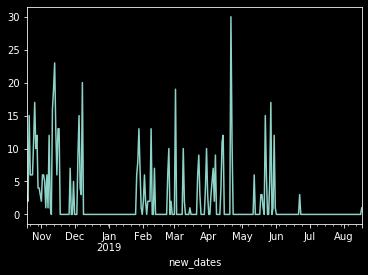

In [121]:
df.set_index('new_dates').resample('D')['lesson'].count().plot(kind = 'line')

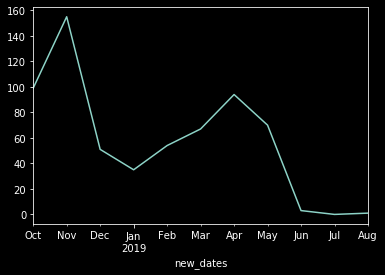

In [122]:
df.set_index('new_dates').resample('M')['lesson'].count().plot(kind = 'line')

In [123]:
awong = df.set_index('new_dates').resample('1D')['lesson'].count()

In [124]:
awong = pd.DataFrame(awong)

In [125]:
awong.reset_index(inplace = True)

In [126]:
awong.drop('new_dates', axis = 1, inplace = True)

In [127]:
awong.columns = ['Andrew_Wong']

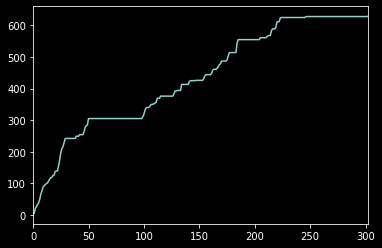

In [128]:
awong['Andrew_Wong'].cumsum().plot(kind = 'line')

In [129]:
mike = pd.read_csv('./lessons/grad/cytmike.csv')

In [130]:
mike

,dates,lesson
0,"Monday, Dec 2nd",Capstone Project
1,"Tuesday, Nov 26th",Managing Your Job Search
2,"Wednesday, Nov 13th",CSC Weekly Activity
3,"Wednesday, Nov 13th",Job Search Action Plan
4,"Wednesday, Nov 13th",Confidence
...,...,...
559,"Thursday, Feb 7th",Your First Data Science Codealong!
560,"Thursday, Feb 7th",Introduction to Variables: Variable Assignment
561,"Thursday, Feb 7th",Working with Lessons on Learn - Lab
562,"Thursday, Feb 7th",Working with Lessons on Learn


In [131]:
new_dates = []

for x in mike['dates']:
    new_dates.append(update_date(x))
mike['new_dates'] = new_dates
mike['new_dates'] = pd.to_datetime(mike['new_dates'])

In [132]:
mike_c = mike.set_index('new_dates').resample('1D')['lesson'].count()

In [133]:
mike_c = pd.DataFrame(mike_c)

In [134]:
mike_c.reset_index(inplace = True)
mike_c.drop('new_dates', axis = 1, inplace = True)
mike_c.columns = ['Michael_Cheng']

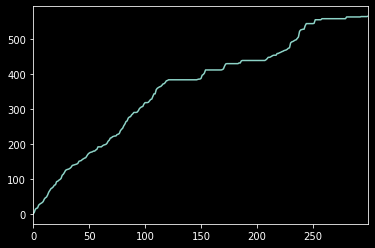

In [135]:
mike_c['Michael_Cheng'].cumsum().plot(kind = 'line')

In [136]:
kyle = pd.read_csv('./lessons/grad/kylejohnson363.csv')

In [137]:
kyle.shape

(1074, 2)

In [138]:
kyle.drop_duplicates(subset = ['lesson'], inplace = True)

In [139]:
kyle.shape

(639, 2)

In [140]:
new_dates = []

for x in kyle['dates']:
    new_dates.append(update_date(x))
kyle['new_dates'] = new_dates
kyle['new_dates'] = pd.to_datetime(kyle['new_dates'])

In [141]:
kyle_j = kyle.set_index('new_dates').resample('1D')['lesson'].count()

In [142]:
kyle_j = pd.DataFrame(kyle_j)

In [143]:
kyle_j.reset_index(inplace = True)
kyle_j.drop('new_dates', axis = 1, inplace = True)
kyle_j.columns = ['Kyle_Johnson']

In [144]:
matt = pd.read_csv('./lessons/grad/matthewsparr.csv')

In [145]:
new_dates = []

for x in matt['dates']:
    new_dates.append(update_date(x))
matt['new_dates'] = new_dates
matt['new_dates'] = pd.to_datetime(matt['new_dates'])

In [146]:
matt_s = matt.set_index('new_dates').resample('1D')['lesson'].count()

In [147]:
matt_s = pd.DataFrame(matt_s)

In [148]:
matt_s.reset_index(inplace = True)
matt_s.drop('new_dates', axis = 1, inplace = True)
matt_s.columns = ['Matt_Sparr']

In [149]:
ray = pd.read_csv('./lessons/grad/rwilleynyc.csv')

In [150]:
ray.shape

(1069, 2)

In [151]:
ray.drop_duplicates(subset = ['lesson'], inplace = True)

In [152]:
ray.shape

(633, 2)

In [153]:
new_dates = []

for x in ray['dates']:
    new_dates.append(update_date(x))
ray['new_dates'] = new_dates
ray['new_dates'] = pd.to_datetime(ray['new_dates'])

In [154]:
ray_w = ray.set_index('new_dates').resample('1D')['lesson'].count()

In [155]:
ray_w = pd.DataFrame(ray_w)

In [156]:
ray_w.reset_index(inplace = True)
ray_w.drop('new_dates', axis = 1, inplace = True)
ray_w.columns = ['Raymond_Wiley']

In [157]:
steve = pd.read_csv('./lessons/grad/stevhliu.csv')

In [158]:
new_dates = []

for x in steve['dates']:
    new_dates.append(update_date(x))
steve['new_dates'] = new_dates
steve['new_dates'] = pd.to_datetime(steve['new_dates'])

In [159]:
steve_l = steve.set_index('new_dates').resample('1D')['lesson'].count()

In [160]:
steve_l = pd.DataFrame(steve_l)

In [161]:
steve_l.reset_index(inplace = True)
steve_l.drop('new_dates', axis = 1, inplace = True)
steve_l.columns = ['Steven_Liu']

In [162]:
df = pd.concat([awong, mike_c, kyle_j, matt_s, ray_w, steve_l], axis = 1)

In [164]:
df.to_csv('df.csv', index = False)

In [163]:
plt.style.use('dark_background')

Text(0.5, 1.0, 'Number of Lessons Completed by SP Graduates')

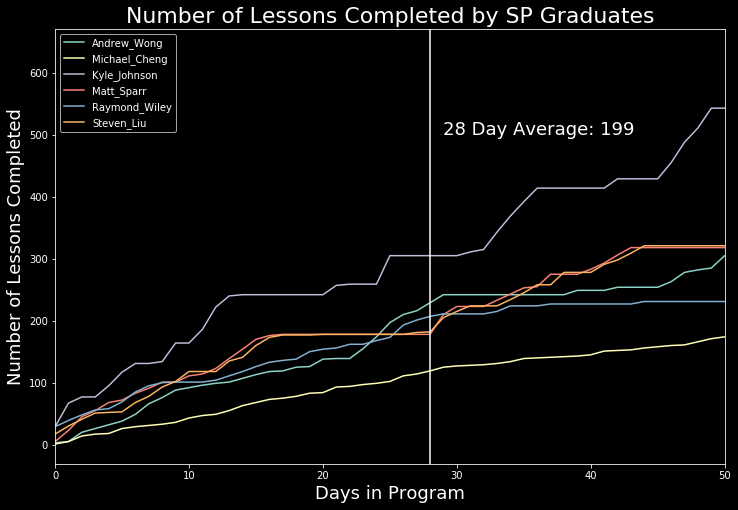

In [71]:

my_fig = df.cumsum().plot(kind = 'line', figsize = (12, 8))
my_fig.set_xlim(0, 50)
my_fig.axvline(28, color = 'white')
my_fig.text(29, 500, '28 Day Average: 199', fontsize = 18)
my_fig.set_ylabel('Number of Lessons Completed', fontsize = 18)
my_fig.set_xlabel('Days in Program', fontsize = 18)
my_fig.set_title('Number of Lessons Completed by SP Graduates', fontsize = 22)

In [73]:
df.head(28).sum().mean()

199.16666666666666

In [85]:
df.loc[0:29].sum().mean()

216.33333333333334

In [86]:
df.loc[30:60].sum().mean()

103.5

In [87]:
df.loc[61:90].sum().mean()

67.83333333333333

In [88]:
df.loc[91:120].sum().mean()

66.16666666666667

In [89]:
df.loc[121:150].sum().mean()

28.0

In [92]:
df.loc[151:180].sum().mean()

27.166666666666668